In [1]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io

In [2]:
filename = '/home/garner1/histoqc_output_20200609-091759/TCGA-55-8301-01Z-00-DX1.2A66E0FC-84F2-4DF8-B06E-D7CDD7AA82C7.svs/TCGA-55-8301-01Z-00-DX1.2A66E0FC-84F2-4DF8-B06E-D7CDD7AA82C7.svs_mask_use.png'
image = io.imread(filename)

In [3]:
import os.path 
lista = os.path.basename(filename).split(sep='.')
filename  =lista[0]+'.'+lista[1] # get the sample ID

In [4]:
# locate the result file
import pandas as pd
results = '/home/garner1/histoqc_output_20200609-091759/results.tsv'
df = pd.read_csv(results,sep='\t',skiprows=(0,1,2,3,4))

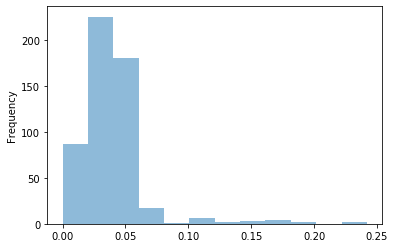

In [42]:
df['perc_pixel2use'] = df.pixels_to_use/(df.height*df.width)*100 # perc of usable pixels over total slide area
ax = df['perc_pixel2use'].plot.hist(bins=12, alpha=0.5)

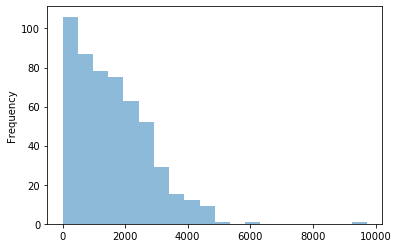

In [53]:
df['area2use'] = df.mpp_x*df.mpp_y*df.pixels_to_use/10**2 # usable tissue area per 100 squared micrometers
ax = df['area2use'].plot.hist(bins=20, alpha=0.5)

In [43]:
'''
Select the samples that satisfy:
- magnification is 40x
- no pen markings
- large enough tissue area
'''
fdf = df[(df.base_mag == 40.0) & (df.pen_markings == 0.0) & (df.area2use >= 1000)]

In [59]:
fdf[fdf.columns[0]].to_csv('filtered_LUADsamples.base_mag40x-woPenMarkings-areaGE1000.tsv',
                           sep='\t',
                          index=False)

/home/garner1/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
